In [1]:
from __future__ import print_function
%matplotlib inline
import urllib.request
from pycocotools.coco import COCO
import os, sys, zipfile
import shutil
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# Record package versions for reproducibility
print("os: %s" % os.name)
print("sys: %s" % sys.version)
print("numpy: %s, %s" % (np.__version__, np.__file__))

os: nt
sys: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
numpy: 1.16.2, C:\Users\Kartikaeya\Anaconda3\lib\site-packages\numpy\__init__.py


In [3]:
# Setup data paths
dataDir = '../..'
dataType = 'train2017'
annDir = '{}/annotations'.format(dataDir)
annZipFile = '{}/annotations_train{}.zip'.format(dataDir, dataType)
annFile = '{}/instances_{}.json'.format(annDir, dataType)
annURL = 'http://images.cocodataset.org/annotations/annotations_train{}.zip'.format(dataType)
print (annDir)
print (annFile)
print (annZipFile)
print (annURL)

../../annotations
../../annotations/instances_train2017.json
../../annotations_traintrain2017.zip
http://images.cocodataset.org/annotations/annotations_traintrain2017.zip


In [4]:
# Download data if not available locally
if not os.path.exists(annDir):
    os.makedirs(annDir)
if not os.path.exists(annFile):
    if not os.path.exists(annZipFile):
        print ("Downloading zipped annotations to " + annZipFile + " ...")
        with urllib.request.urlopen(annURL) as resp, open(annZipFile, 'wb') as out:
            shutil.copyfileobj(resp, out)
        print ("... done downloading.")
    print ("Unzipping " + annZipFile)
    with zipfile.ZipFile(annZipFile,"r") as zip_ref:
        zip_ref.extractall(dataDir)
    print ("... done unzipping")
print ("Will use annotations in " + annFile)

Will use annotations in ../../annotations/instances_train2017.json


In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=16.85s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food animal person sports kitchen indoor appliance electronic outdoor vehicle accessory furniture


In [40]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
# print(imgIds[0:10])
# imgIds = coco.getImgIds(imgIds = [185472])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# print(len(imgIds))

(427, 640, 3)


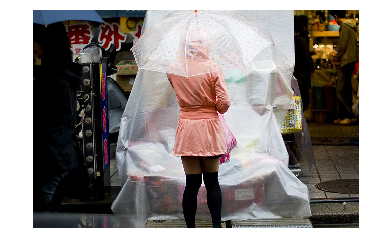

In [41]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
print(I.shape)
plt.axis('off')
plt.imshow(I)
plt.show()

[[318.57, 50.86, 281.15, 69.09, 272.51, 96.91, 258.12, 114.19, 292.66, 198.63, 273.47, 279.23, 291.7, 284.03, 303.22, 336.8, 293.62, 368.47, 298.42, 416.44, 305.14, 422.2, 322.41, 422.2, 323.37, 362.71, 332.0, 323.37, 335.84, 325.29, 341.6, 355.03, 341.6, 381.9, 354.07, 418.36, 373.27, 421.24, 365.59, 331.04, 371.35, 284.99, 402.05, 257.16, 369.43, 203.42, 388.62, 183.27, 372.31, 125.7, 349.28, 71.97]]


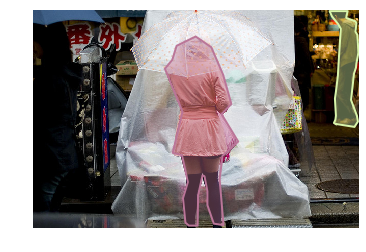

In [42]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None )
anns = coco.loadAnns(annIds)
print(anns[0]['segmentation'])
coco.showAnns(anns)

In [ ]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

[350, 112, 2]


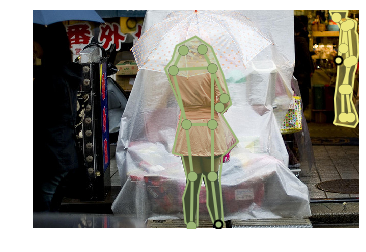

In [46]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'])
anns = coco_kps.loadAnns(annIds)
print((anns[0]['keypoints'][18:21]))
coco_kps.showAnns(anns)

In [47]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


A TV with a man and a woman on it's display.
Television showing a movie with one man threatening another with a razor blade.
A television set is on next to a bottle of water.
A tv on with a man holding a knife at a guy's head and a bottle of mineral water in the foreground 
A bottle of mineral water by a TV that is on.


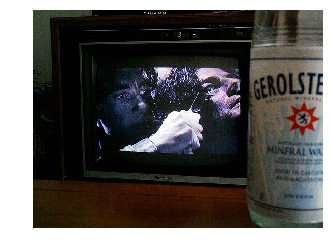

In [48]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()